## Assignment 2
#### Data Management (Spring/Summer 2018) at OSIPP, Osaka U

### Python version

### Preamble

In [2]:
import os
#import numpy as np
import pandas as pd
#from scipy import stats
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from linearmodels.panel import PanelOLS
import matplotlib
import matplotlib.pyplot as plt
#print(matplotlib.get_cachedir()) # 日本語出力のためにキャッシュを消す

In [2]:
os.chdir("..") # set the working directory

In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

### Import data

In [5]:
ta_panel = pd.read_table('input/syuuin_2003_2014_py.csv',dtype=None,sep=',',encoding="cp932") 
ta_panel['const'] = 1 # add constant 
ta_panel = ta_panel[ta_panel['PREFEC'] < 50]
ta_panel = ta_panel[ta_panel['RESPONSE'] != 9]
ta_panel = ta_panel[ta_panel['ELECYEAR'] != 2002]
print(ta_panel.describe())

               uid     ELECYEAR     RESPONSE       PREFEC     DISTRICT  \
count  5407.000000  5407.000000  5407.000000  5407.000000  5407.000000   
mean   1680.143148  2008.734603     0.985389    21.029591     5.731274   
std     973.404699     4.034630     0.157349    12.341164     5.083006   
min       2.000000  2003.000000     0.000000     1.000000     1.000000   
25%     837.500000  2005.000000     1.000000    12.000000     2.000000   
50%    1687.000000  2009.000000     1.000000    20.000000     4.000000   
75%    2530.500000  2012.000000     1.000000    28.000000     8.000000   
max    3352.000000  2014.000000     2.000000    47.000000    25.000000   

           PRBLOCK      INCUMB         TERM          SEX          AGE  \
count  4579.000000  5407.00000  3392.000000  4381.000000  4379.000000   
mean     46.693164     1.79545     1.451356     1.146314    50.510847   
std      22.216025     0.88851     2.390262     0.353461    11.171779   
min       1.000000     1.00000     0.0000

### Make a summary table

In [5]:
ta_panel[['ELECYEAR', 'PREFEC', 'DISTRICT', 'INCUMB', 'TERM', 'SEX', 'AGE', 'RESULT']].agg(['mean','std','min','max','count']).T.to_latex("output/sum_stat.tex")


### Check the number of candidates and politicians

In [6]:
count_cand = ta_panel['PARTY'].groupby(ta_panel['PARTY']).count().reset_index(name='count').sort_values('count',ascending=False).set_index('PARTY')

print(count_cand)

        count
PARTY        
自民党      1429
共産党      1318
民主党      1269
諸派        328
無所属       319
日本維新の会    151
社民党       134
未来の党      111
みんなの党      79
維新の党       77
公明党        45
社会民主党      38
次世代の党      38
国民新党       21
生活の党       13
保守新党       11
新党日本        9
無所属の会       8
新党大地        7
改革クラブ       1
自由連合        1


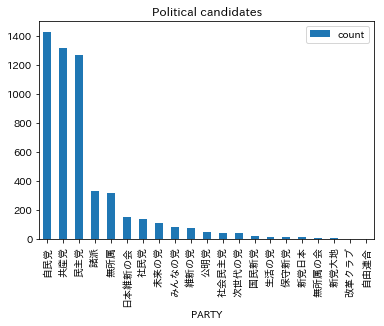

In [7]:
#ta_panel['PARTY'].value_counts().plot(kind='bar')
ta_panel['PARTY'].groupby(ta_panel['PARTY']).count().reset_index(name='count').sort_values('count',ascending=False).set_index('PARTY').plot.bar()

plt.title('Political candidates')
plt.savefig("output/numb_cand.png", bbox_inches='tight')

## LDP has the largest number of candidates

In [8]:
winner = ta_panel[ta_panel['RESULT'] != 4]
count_winner = winner['PARTY'].groupby(winner['PARTY']).count().reset_index(name='count').sort_values('count',ascending=False).set_index('PARTY')

print(count_winner)

        count
PARTY        
自民党      1133
民主党       681
無所属        48
日本維新の会     46
維新の党       40
公明党        35
みんなの党      21
共産党        21
社民党        16
未来の党        9
国民新党        7
社会民主党       5
保守新党        4
次世代の党       2
生活の党        2
新党日本        2
無所属の会       1
新党大地        1
自由連合        1


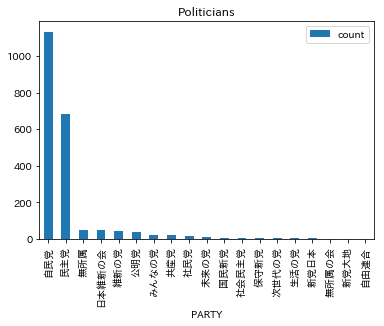

In [9]:
winner['PARTY'].groupby(winner['PARTY']).count().reset_index(name='count').sort_values('count',ascending=False).set_index('PARTY').plot.bar()

plt.title('Politicians')
plt.savefig("output/numb_pol.png", bbox_inches='tight')

In [10]:
count_fm = ta_panel['const'].groupby([ta_panel['PARTY'],ta_panel['SEX']]).count().unstack()

print(count_fm)

SEX        1.0    2.0
PARTY                
みんなの党     73.0    6.0
公明党       35.0    NaN
共産党      772.0  246.0
国民新党      20.0    1.0
改革クラブ      1.0    NaN
新党大地       5.0    2.0
新党日本       9.0    NaN
日本維新の会   139.0   12.0
未来の党      85.0   26.0
次世代の党     36.0    2.0
民主党      881.0  121.0
無所属      208.0   25.0
生活の党      11.0    2.0
社会民主党     28.0   10.0
社民党       60.0   12.0
維新の党      68.0    9.0
自民党     1060.0   92.0
諸派       249.0   75.0


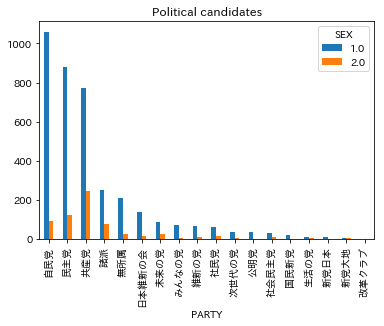

In [11]:
ta_panel['const'].groupby([ta_panel['PARTY'],ta_panel['SEX']]).count().unstack().reset_index().sort_values(1.0,ascending=False).set_index('PARTY').plot.bar()

plt.title('Political candidates')
plt.savefig("output/numb_cand_fm.png", bbox_inches='tight')

## JSP has the largest number of female candidates

### Check the average level of not supporting fiscal policies for fiscal consolidation

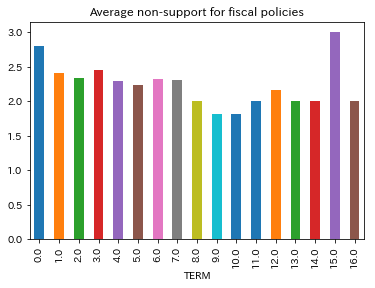

In [12]:
rest = ta_panel[ta_panel['yn_fiscalpol'] != 99]
#print(rest['yn_fiscalpol'].groupby(ta_panel['TERM']).describe()) 

rest['yn_fiscalpol'].groupby(ta_panel['TERM']).mean().plot.bar()
plt.title('Average non-support for fiscal policies')
plt.savefig("output/fiscal_pol.png", bbox_inches='tight')

## We obeserve: Longer TERM means more support for fiscal policies
## Endogeneity: 1. TERM may be correlated with another variable such as AGE (omitted variables bias)
##              2. Those who supporting fiscal policies might be more likely to win (reverse causality)

### Make regression tables

In [13]:
rest = ta_panel[(ta_panel['yn_fiscalpol'] != 99)]

# OLS regressions
reg1 = smf.ols('yn_fiscalpol ~ TERM', data=rest).fit()
reg2 = smf.ols('yn_fiscalpol ~ TERM + INCUMB + AGE + SEX', data=rest).fit()
reg3 = smf.ols('yn_fiscalpol ~ TERM + C(uid) + C(ELECYEAR)', data=rest).fit()
reg4 = smf.ols('yn_fiscalpol ~ TERM + INCUMB + AGE + C(uid) + C(ELECYEAR)', data=rest).fit()

# summary of results
results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.3f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                        'Model 4'],
                            info_dict={'R-squared' : lambda x: "{:.3f}".format(x.rsquared),
                                       'Number of obs.' : lambda x: "{0:d}".format(int(x.nobs))},
                            regressor_order=['TERM','INCUMB','AGE','SEX'],
                            drop_omitted=True) 

results_table.add_title('Table X - OLS Regressions')

print(results_table)

# save the output table
file = open("output/ols_results.tex", "w")
file.write(results_table.as_latex())
file.close()

## SEX can't be included because it is most likely time-invariant (and thus is absorbed by individual fixed effects)
## TERM becomes insignificant in Model 3, suggesting that the correlation is most likely driven by some time-invariant individual characteristics
## INCUMB shows the negative sign even with FEs. Fresh candidates (oppositions) are less likely to support fiscal policies, and vice versa.

C:\Users\shu\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\shu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\shu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\shu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


             Table X - OLS Regressions
                Model 1   Model 2  Model 3  Model 4 
----------------------------------------------------
TERM           -0.091*** -0.028**  -0.046  0.146**  
               (0.008)   (0.012)   (0.053) (0.069)  
INCUMB                   -0.219***         -0.197***
                         (0.028)           (0.038)  
AGE                      0.000             -0.047   
                         (0.002)           (0.028)  
SEX                      0.046                      
                         (0.052)                    
R-squared      0.037     0.056     0.807   0.811    
Number of obs. 3275      3273      3275    3273     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [3]:
?summary_col